In [108]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.cluster import KMeans
from torch.utils.data import DataLoader, TensorDataset, random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt
import random
import os
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import norm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load datset and reshape it to bring all parameters of one design in one row

In [175]:

S1=np.loadtxt('sparameters_1200.txt') 
S1=S1[700:1200,:] # 500 samples

S2=np.loadtxt('sparameters_2700.txt')
S2=S2[100:300,:] # 200 samples
#S11=np.concatenate((S1,S2),axis=0)

S3=np.loadtxt('sparameters_2100.txt')
S3=S3[0:300,:] # 300 samples
#S11=np.concatenate((S1,S2,S3),axis=0)

S4=np.loadtxt('sparameters_1800.txt')
S4=S4[0:300,:] # 300 samples
# S11=np.concatenate((S1,S2,S3,S4),axis=0)

S5=np.loadtxt('sparameters_200.txt')
S5=S5[0:200,:] # 200 samples

S6=np.loadtxt('sparameters_1500.txt')
S6=S6[0:300,:] # 300 samples

x1=np.loadtxt("patchcoords_1200.txt",delimiter=',')
x1 = x1[:, 2:]
x1= x1.reshape(1200,144)
x1 = x1[700:1200,:]
x2=np.loadtxt('patchcoords_2700.txt',delimiter=',')
x2 = x2[:, 2:]
x2= x2.reshape(300,144)
x2 = x2[100:300,:]
#xx=np.concatenate((x1,x2),axis=0)
x3=np.loadtxt('patchcoords_2100.txt',delimiter=',')
x3 = x3[:, 2:]
x3= x3.reshape(300,144)
x3 = x3[0:300,:]
#xx=np.concatenate((x1,x2,x3),axis=0)
x4=np.loadtxt('patchcoords_1800.txt',delimiter=',')
x4 = x4[:, 2:]
x4= x4.reshape(300,144)
x4 = x4[0:300,:]
# xx=np.concatenate((x1,x2,x3,x4),axis=0)
x5=np.loadtxt('patchcoords_200.txt',delimiter=',')
x5 = x5[:, 2:]
x5= x5.reshape(200,144)
x5 = x5[0:200,:]
x6=np.loadtxt('patchcoords_1500.txt',delimiter=',')
x6 = x6[:, 2:]
x6= x6.reshape(300,144)
x6 = x6[0:300,:]


# keep 6 features but normalize it

In [100]:

S1=np.loadtxt('sparameters_1200.txt') 
S1=S1[700:1200,:] # 500 samples

S2=np.loadtxt('sparameters_2700.txt')
S2=S2[100:300,:] # 200 samples
#S11=np.concatenate((S1,S2),axis=0)

S3=np.loadtxt('sparameters_2100.txt')
S3=S3[0:300,:] # 300 samples
#S11=np.concatenate((S1,S2,S3),axis=0)

S4=np.loadtxt('sparameters_1800.txt')
S4=S4[0:300,:] # 300 samples
# S11=np.concatenate((S1,S2,S3,S4),axis=0)

S5=np.loadtxt('sparameters_200.txt')
S5=S5[0:200,:] # 200 samples

S6=np.loadtxt('sparameters_1500.txt')
S6=S6[0:300,:] # 300 samples

x1=np.loadtxt("patchcoords_1200.txt",delimiter=',')

x1 = x1[700*36:1200*36,:]
x2=np.loadtxt('patchcoords_2700.txt',delimiter=',')

x2 = x2[100*36:300*36,:]
#xx=np.concatenate((x1,x2),axis=0)
x3=np.loadtxt('patchcoords_2100.txt',delimiter=',')

x3 = x3[0:300*36,:]
#xx=np.concatenate((x1,x2,x3),axis=0)
x4=np.loadtxt('patchcoords_1800.txt',delimiter=',')

x4 = x4[0:300*36,:]
# xx=np.concatenate((x1,x2,x3,x4),axis=0)
x5=np.loadtxt('patchcoords_200.txt',delimiter=',')

x5 = x5[0:200*36,:]
x6=np.loadtxt('patchcoords_1500.txt',delimiter=',')

x6 = x6[0:300*36,:]

xx=np.concatenate((x1,x2,x3,x4,x5,x6),axis=0)
S11=np.concatenate((S1,S2,S3,S4,S5,S6),axis=0)
print(xx.shape,S11.shape)
# Get the maximum value in xx
max_vals = np.max(xx)
# Get the minimum value in xx
min_vals = np.min(xx)
print(f"Maximum value in xx: {max_vals}")
print(f"Minimum value in xx: {min_vals}")

# Normalize the data using min-max normalization
xx = (xx - min_vals) / (max_vals - min_vals)
xx= xx.reshape(1800,216)
print(xx.shape,S11.shape)

(64800, 6) (1800, 128)
Maximum value in xx: 0.014806
Minimum value in xx: -0.014806
(1800, 216) (1800, 128)


# Choose which samples to include in dataset

In [ ]:
# 200 samples of 2700.txt
xx= x2
S11 = S2
print(xx.shape,S11.shape)

In [ ]:
# 300 SAMPLES OF 2100.txt
xx= x3
S11 = S3
print(xx.shape,S11.shape)

In [166]:
xx = xx = np.concatenate((x1,x2,x3),axis=0) # 1000 samples
S11=np.concatenate((S1,S2,S3),axis=0)
print(xx.shape,S11.shape)

(1000, 144) (1000, 128)


In [ ]:
# 500 samples of 2100.txt + 2700.txt
xx = np.concatenate((x2,x3),axis=0)
S11=np.concatenate((S2,S3),axis=0)
print(xx.shape,S11.shape)

In [ ]:
# 800 samples of 2100.txt+1800.txt+2700.txt
xx = np.concatenate((x2,x3,x4),axis=0)
S11=np.concatenate((S2,S3,S4),axis=0)
print(xx.shape,S11.shape)


In [ ]:
# 1300 samples of 2100+1800+2700+1200.txt
xx=np.concatenate((x1,x2,x3,x4),axis=0)
S11=np.concatenate((S1,S2,S3,S4),axis=0)
print(xx.shape,S11.shape)


In [45]:
# 1500 samples of 2100+1800+2700+1200+200.txt
xx=np.concatenate((x1,x2,x3,x4,x5),axis=0)
S11=np.concatenate((S1,S2,S3,S4,S5),axis=0)
print(xx.shape,S11.shape)

(1500, 216) (1500, 128)


In [176]:
# 1800 samples of 2100+1800+2700+1200+200+1500.txt
xx=np.concatenate((x1,x2,x3,x4,x5,x6),axis=0)
S11=np.concatenate((S1,S2,S3,S4,S5,S6),axis=0)
print(xx.shape,S11.shape)

(1800, 144) (1800, 128)


In [225]:
xx=np.loadtxt('patchcoords_5.75_2800.txt',delimiter='\t')
xx= xx.reshape(2800*36,6)
# Get the maximum value in xx
# max_vals = np.max(xx)
# # Get the minimum value in xx
# min_vals = np.min(xx)
# print(f"Maximum value in xx: {max_vals}")
# print(f"Minimum value in xx: {min_vals}")

# # Normalize the data using min-max normalization
# xx = (xx - min_vals) / (max_vals - min_vals)
xx = xx[:, 2:]
xx= xx.reshape(2800,144)
xx = xx[0:2800,:]
S11=np.loadtxt('sparameters_5.75_2800.txt')
S11=S11[0:2800,:]

Number of designs with S11 magnitude less than -10 dB at at least one frequency: 2071
S11 shape: (1000, 128)


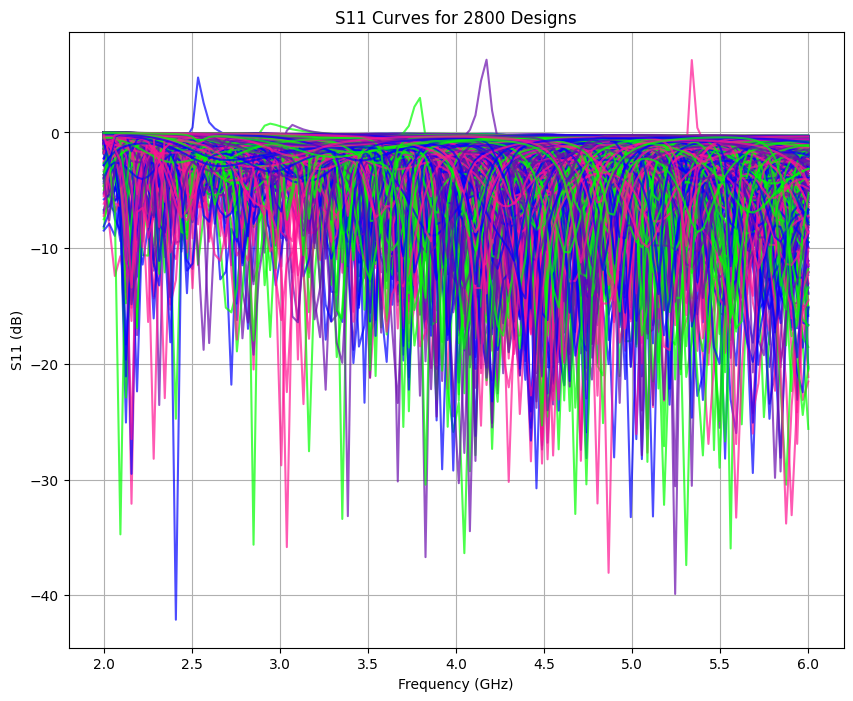

In [226]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

import numpy as np

# Load the S11 parameters data from the text file
file_path = 'sparameters_5.75_2800.txt'
sparams_data = np.loadtxt(file_path)

# Define the frequency range from 1 GHz to 6 GHz with 128 points
frequencies = np.linspace(1e9, 6e9, 128)

# Initialize a dictionary to store designs with S11 values less than -10 dB
designs_below_minus_10 = {}

# Iterate over each design's S11 data
for i, s11_values in enumerate(sparams_data):
    # Find indices where S11 is less than -10 dB
    indices_below_minus_10 = np.where(s11_values < -10)[0]
    if indices_below_minus_10.size > 0:
        # Store the frequencies corresponding to these indices
        designs_below_minus_10[i + 1] = frequencies[indices_below_minus_10].tolist()

# Output the number of designs and the frequencies where S11 < -10 dB
print(f"Number of designs with S11 magnitude less than -10 dB at at least one frequency: {len(designs_below_minus_10)}")
# for design, freqs in designs_below_minus_10.items():
#     print(f"Design {design} has S11 magnitude less than -10 dB at frequencies: {freqs}")

# Optionally, you can save this data to a text file
with open('designs_frequencies_below_minus_10.txt', 'w') as file:
    file.write("Design\tFrequencies\n")
    for design, freqs in designs_below_minus_10.items():
        freqs_str = ', '.join(map(str, freqs))
        file.write(f"{design}\t{freqs_str}\n")

# Load the S-parameters data
S_new = np.loadtxt('sparameters_5.75_2800.txt')
S_new = S_new[0:1000,:]


# Generate frequencies from 2 to 6 GHz (128 points)
frequencies = np.linspace(2, 6, 128)

# Check the shape of the data
print(f"S11 shape: {S_new.shape}")

# Custom colormap with purple, blue, pink, and green
colors = [
    "#6a0dad",  # purple
    "#0000ff",  # blue
    "#ff1493",  # pink
    "#00ff00"   # green
]

cmap = ListedColormap(colors * (2800 // len(colors) + 1))

# Plot the S11 curves
plt.figure(figsize=(10, 8))

for i in range(1000):
    plt.plot(frequencies, S_new[i], color=cmap(i), alpha=0.7)

plt.title('S11 Curves for 2800 Designs')
plt.xlabel('Frequency (GHz)')
plt.ylabel('S11 (dB)')
plt.grid(True)
plt.show()


# Reshape input for 3d cnn

In [227]:
# Reshape data for 3D CNN input
# First, reshape to separate each parameter of each patch
num_designs = xx.shape[0]
num_patches = 36  # You have 36 patches per design
num_params = 4    # 6 parameters per patch

# Reshape such that each parameter is split out and then each patch
xx_reshaped = xx.reshape(num_designs, num_patches, num_params)

# Transpose to bring parameters to the second dimension
xx_reshaped = xx_reshaped.transpose(0, 2, 1)

# Now reshape the patches into a 6x6 grid
xx_final = xx_reshaped.reshape(num_designs, num_params, 6, 6)
xx_final = xx_final.reshape(-1, 4, 1, 6, 6) 

# Convert to PyTorch tensor
xx_tensor = torch.tensor(xx_final, dtype=torch.float32)
# Assuming xx_tensor is your input tensor shaped [batch_size, 6, 6, 6]


# Assuming S11 values are correctly loaded and formatted
S11_tensor = torch.tensor(S11, dtype=torch.float32)

# Check the final shape
print("Final tensor shape for 3D CNN:", xx_tensor.shape)
print("Final output shape for 3D CNN:", S11_tensor.shape)

Final tensor shape for 3D CNN: torch.Size([2800, 4, 1, 6, 6])
Final output shape for 3D CNN: torch.Size([2800, 128])


#### parameters wer in order c_x,c_y,lenght,width,off_x,off_y

In [228]:
xx_tensor


tensor([[[[[ 0.0058,  0.0063,  0.0086,  0.0063,  0.0058,  0.0066],
           [ 0.0051,  0.0066,  0.0061,  0.0062,  0.0059,  0.0067],
           [ 0.0050,  0.0055,  0.0068,  0.0065,  0.0067,  0.0063],
           [ 0.0058,  0.0063,  0.0086,  0.0063,  0.0058,  0.0066],
           [ 0.0051,  0.0066,  0.0061,  0.0062,  0.0059,  0.0067],
           [ 0.0050,  0.0055,  0.0068,  0.0065,  0.0067,  0.0063]]],


         [[[ 0.0058,  0.0058,  0.0058,  0.0059,  0.0055,  0.0070],
           [ 0.0063,  0.0063,  0.0053,  0.0050,  0.0064,  0.0064],
           [ 0.0065,  0.0060,  0.0055,  0.0064,  0.0054,  0.0062],
           [ 0.0058,  0.0058,  0.0058,  0.0059,  0.0055,  0.0070],
           [ 0.0063,  0.0063,  0.0053,  0.0050,  0.0064,  0.0064],
           [ 0.0065,  0.0060,  0.0055,  0.0064,  0.0054,  0.0062]]],


         [[[ 0.0000,  0.0000,  0.0000,  0.0011, -0.0009,  0.0011],
           [-0.0006,  0.0003,  0.0008,  0.0008, -0.0006,  0.0009],
           [-0.0005, -0.0010, -0.0007,  0.0004, -0.001

## Calculate Split Size

In [229]:
# Assume xx_tensor is your input features tensor and S11_tensor is your labels tensor
total_samples = xx_tensor.shape[0]

# Calculate split sizes
train_size = int(0.7 * total_samples)
val_size = int(0.2 * total_samples)
test_size = total_samples - train_size - val_size

print("Train size:", train_size, "Validation size:", val_size, "Test size:", test_size)



Train size: 1959 Validation size: 560 Test size: 281


## Split the data

In [230]:
# Split features
X_train = xx_tensor[:train_size]
X_val = xx_tensor[train_size:train_size + val_size]
X_test = xx_tensor[train_size + val_size:]

# Split labels
y_train = S11_tensor[:train_size]
y_val = S11_tensor[train_size:train_size + val_size]
y_test = S11_tensor[train_size + val_size:]

print('X_train:', X_train.shape, 'X_val:', X_val.shape, 'X_test:', X_test.shape)
print('y_train:', y_train.shape, 'y_val:', y_val.shape, 'y_test:', y_test.shape)


X_train: torch.Size([1959, 4, 1, 6, 6]) X_val: torch.Size([560, 4, 1, 6, 6]) X_test: torch.Size([281, 4, 1, 6, 6])
y_train: torch.Size([1959, 128]) y_val: torch.Size([560, 128]) y_test: torch.Size([281, 128])


# Prepare DataLoader

In [231]:
from torch.utils.data import DataLoader, TensorDataset

# Convert to TensorDataset
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

# Create DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print to verify DataLoaders
for inputs, targets in train_loader:
    print('Batch from training loader:', inputs.shape, targets.shape)
    break

for inputs, targets in val_loader:
    print('Batch from validation loader:', inputs.shape, targets.shape)
    break

for inputs, targets in test_loader:
    print('Batch from test loader:', inputs.shape, targets.shape)
    break


Batch from training loader: torch.Size([32, 4, 1, 6, 6]) torch.Size([32, 128])
Batch from validation loader: torch.Size([32, 4, 1, 6, 6]) torch.Size([32, 128])
Batch from test loader: torch.Size([32, 4, 1, 6, 6]) torch.Size([32, 128])


In [240]:
def train_and_evaluate(model,criterion,optimizer,train_loader, val_loader, num_epochs=100, batch_size=32):

    
    
    train_losses = []
    val_losses = []

    
    for epoch in range(num_epochs):
        # Train the model
        model.train()
        epoch_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * inputs.size(0)
        epoch_loss /= len(train_loader.dataset)
        train_losses.append(epoch_loss)

        # Validate the model
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)

        if (epoch+1) % 100 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}")

    return train_losses, val_losses, model

In [241]:
# Plotting losses
def plot_loss(train_losses, val_losses):
    plt.figure()
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


In [242]:
def evaluate_model(model, test_loader):
    model.eval()
    predictions, actuals = [], []
    
    with torch.no_grad():
        for data, targets in test_loader:
            outputs = model(data)
            predictions.append(outputs.cpu().numpy())  # Append batches
            actuals.append(targets.cpu().numpy())      # Append batches
    
    # Concatenate batches into single numpy arrays
    predictions = np.concatenate(predictions, axis=0)
    actuals = np.concatenate(actuals, axis=0)
    
    # Calculate metrics
    mse = mean_squared_error(actuals.ravel(), predictions.ravel())
    r2 = r2_score(actuals.ravel(), predictions.ravel())

    print(f'Mean Squared Error on test dataset: {mse}')
    #print(f'R-squared: {r2}')

## Define the 3D CNN model

In [232]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class PatchAntennaCNN3D(nn.Module):
    def __init__(self):
        super(PatchAntennaCNN3D, self).__init__()
        # Input shape (batch_size, 4, 1, 6, 6)
        self.conv1 = nn.Conv3d(4, 16, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1))
        self.bn1 = nn.BatchNorm3d(16)
        self.dropout1 = nn.Dropout3d(0.2)
        
        self.conv2 = nn.Conv3d(16, 32, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1))
        self.bn2 = nn.BatchNorm3d(32)
        self.dropout2 = nn.Dropout3d(0.3)

        # self.conv3 = nn.Conv3d(32, 64, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1))
        # self.bn3 = nn.BatchNorm3d(64)
        # self.dropout3 = nn.Dropout3d(0.4)

        # Fully connected layers
        self.fc1 = nn.Linear(32 * 1 * 6 * 6, 256)  # Adjusted to the size after convolutions
        self.fc2 = nn.Linear(256, 128)  # Output layer for 128 frequencies

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout1(x)
        
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.dropout2(x)

        # x = F.relu(self.bn3(self.conv3(x)))
        # x = self.dropout3(x)

        # Flatten the output for the fully connected layer
        x = x.view(-1, 32 * 1 * 6 * 6)  # Flatten the output
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


## Train the model

In [233]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Define your model, criterion, optimizer, and dataloaders setup
# Model instantiation and moving it to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PatchAntennaCNN3D().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Assume train_loader and val_loader are already defined
num_epochs = 1000  # Define the number of epochs

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    train_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    
    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)

    val_loss /= len(val_loader.dataset)

    if (epoch + 1) % 100 == 0:  # Print every 100 epochs
        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

# Evaluation on the test dataset
model.eval()  # Set the model to evaluation mode
test_loss = 0.0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item() * inputs.size(0)

test_loss /= len(test_loader.dataset)
print(f'Test MSE: {test_loss:.4f}')


Epoch 100/1000, Train Loss: 2.7172, Val Loss: 5.9596
Epoch 200/1000, Train Loss: 2.1505, Val Loss: 5.9143
Epoch 300/1000, Train Loss: 1.8851, Val Loss: 5.7001
Epoch 400/1000, Train Loss: 1.6540, Val Loss: 5.7497
Epoch 500/1000, Train Loss: 1.5162, Val Loss: 5.7340
Epoch 600/1000, Train Loss: 1.4246, Val Loss: 5.7557
Epoch 700/1000, Train Loss: 1.4161, Val Loss: 5.7312
Epoch 800/1000, Train Loss: 1.3030, Val Loss: 5.6887
Epoch 900/1000, Train Loss: 1.2729, Val Loss: 5.6891
Epoch 1000/1000, Train Loss: 1.2528, Val Loss: 5.8214
Test MSE: 5.2691


## Evaluate model's performance with active learning

## QBC

In [236]:
import torch
import numpy as np
from sklearn.cluster import KMeans

def initial_sampling(X, k):
    # Assuming X is a PyTorch tensor of shape [1959, 4, 1, 6, 6]
    # Flatten the data to 2D: from [1959, 4, 1, 6, 6] to [1959, 144]
    if isinstance(X, torch.Tensor):
        X = X.reshape(X.size(0), -1)  # Use reshape to handle non-contiguous layouts
        X = X.numpy()  # Convert to NumPy array for KMeans compatibility
    elif isinstance(X, np.ndarray):
        X = X.reshape(X.shape[0], -1)  # Reshape if it's already a numpy array
    
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    centroids = kmeans.cluster_centers_
    
    initial_indices = []
    for center in centroids:
        # Compute the distance from each point in X to this centroid
        distances = np.linalg.norm(X - center, axis=1)
        closest_index = np.argmin(distances)
        initial_indices.append(closest_index)
    
    unlabeled_indices = list(set(range(len(X))) - set(initial_indices))
    
    return initial_indices, unlabeled_indices

# Example usage:
# Convert your X_train from PyTorch tensor and perform initial sampling
# X_train should be a tensor of shape [1959, 4, 1, 6, 6]
# Assume X_train is defined and appropriately prepared for this function
initial_indices, unlabeled_indices = initial_sampling(X_train, k=100)


In [237]:
# Acquisition functions implemented as separate functions
def expected_improvement(mean, std, best_y):
    z = (mean - best_y) / std
    return (mean - best_y) * norm.cdf(z) + std * norm.pdf(z)

def probability_of_improvement(mean_predictions, std_predictions, y_min, epsilon=1e-3):
    z = (mean_predictions - y_min - epsilon) / std_predictions
    pi = norm.cdf(z)
    return torch.tensor(pi, dtype=torch.float32)

def lower_confidence_bound(mean, std, kappa=1.0):
    return mean - kappa * std

def upper_confidence_bound(mean, std, beta=1.0):
    return mean + beta * std

acquisition_functions = {
    'ei': expected_improvement,
    'pi': probability_of_improvement,
    'lcb': lower_confidence_bound,
    'ucb': upper_confidence_bound
}

In [238]:
# Active Learning loop generalized for different acquisition functions
def train_bo(model,X, y, X_val, y_val, initial_indices, unlabeled_indices, num_iterations=100, batch_size=32, num_epochs=10, acq_func='pi'):
    labeled_indices = initial_indices.copy()
    unlabeled_indices_new=unlabeled_indices.copy()
    # Initialize the Bayesian Neural Network
    model = model.to(dev)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    


    train_losses = []
    val_losses = []

    for iteration in range(num_iterations):
        labeled_X = X[labeled_indices]
        labeled_y = y[labeled_indices]

        train_dataset = TensorDataset(torch.tensor(labeled_X, dtype=torch.float32).to(dev), torch.tensor(labeled_y, dtype=torch.float32).to(dev))
        val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32).to(dev), torch.tensor(y_val, dtype=torch.float32).to(dev))

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        for epoch in range(num_epochs):
            model.train()
            epoch_loss = 0.0
            for inputs, targets in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item() * inputs.size(0)
            epoch_loss /= len(train_loader.dataset)

        train_losses.append(epoch_loss)

        # bayesian optimization with mc dropout
        with torch.no_grad():
            unlabeled_X = X[unlabeled_indices_new]
            unlabeled_X_tensor = torch.tensor(unlabeled_X, dtype=torch.float32).to(dev)
            # performing mc dropout
            outputs = torch.stack([model(unlabeled_X_tensor) for _ in range(10)], dim=0)
            mean = outputs.mean(dim=0).mean(dim=1)  # Aggregate over the multiple outputs
            std = outputs.std(dim=0).mean(dim=1)  # Aggregate over the multiple outputs
            
            # Use the best observed value from the labeled data
            best_y = labeled_y.min().item()

            # Select the acquisition function based on acq_func
            acq_func1 = acquisition_functions[acq_func]
            acquisition_values = acq_func1(mean, std, best_y)

            if acquisition_values.numel() > 0:
                next_index_relative = torch.argmax(acquisition_values).item()
                next_index = unlabeled_indices_new[next_index_relative]
                labeled_indices.append(next_index)
                unlabeled_indices_new.remove(next_index)
                
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)

        

        if (iteration + 1) % 100 == 0:
            print(f"Iteration {iteration + 1}/{num_iterations}, Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}, Number of labeled indices: {len(labeled_indices)}")

    return train_losses, val_losses, model, labeled_indices

## Lower confidence bound

In [239]:
xx = xx
S11 = S11

input_dim = xx.shape[1]
output_dim = S11.shape[1]

# Ensure device is set
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Initial sampling
# initial_indices, unlabeled_indices = initial_sampling(X_train, k=100)
initial_indices3 = initial_indices
unlabeled_indices3= unlabeled_indices



# Initialize the Bayesian Neural Network
bnn_model = PatchAntennaCNN3D().to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train ith Bayesian Optimization
train_losses_, val_losses, bnn_model1, labeled_indices_lcb = train_bo(
    bnn_model, X_train, y_train, X_val, y_val, initial_indices3, unlabeled_indices3,
    num_iterations=900, batch_size=32, num_epochs=10, acq_func='lcb'
)

/var/folders/tt/2b3cc4b54b349j97hzm_dr740000gn/T/ipykernel_14477/1138950366.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(labeled_X, dtype=torch.float32).to(dev), torch.tensor(labeled_y, dtype=torch.float32).to(dev))
/var/folders/tt/2b3cc4b54b349j97hzm_dr740000gn/T/ipykernel_14477/1138950366.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32).to(dev), torch.tensor(y_val, dtype=torch.float32).to(dev))
/var/folders/tt/2b3cc4b54b349j97hzm_dr740000gn/T/ipykernel_14477/1138950366.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone

Iteration 100/900, Train Loss: 0.5357, Val Loss: 6.2054, Number of labeled indices: 200
Iteration 200/900, Train Loss: 0.4949, Val Loss: 6.1534, Number of labeled indices: 300
Iteration 300/900, Train Loss: 0.5145, Val Loss: 5.9545, Number of labeled indices: 400
Iteration 400/900, Train Loss: 0.4742, Val Loss: 5.9006, Number of labeled indices: 500
Iteration 500/900, Train Loss: 0.5562, Val Loss: 5.8444, Number of labeled indices: 600
Iteration 600/900, Train Loss: 0.5478, Val Loss: 5.8309, Number of labeled indices: 700
Iteration 700/900, Train Loss: 0.6086, Val Loss: 5.8474, Number of labeled indices: 800
Iteration 800/900, Train Loss: 0.6404, Val Loss: 5.8368, Number of labeled indices: 900
Iteration 900/900, Train Loss: 0.6817, Val Loss: 5.8901, Number of labeled indices: 1000


/var/folders/tt/2b3cc4b54b349j97hzm_dr740000gn/T/ipykernel_14477/3295333280.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(labeled_X, dtype=torch.float32), torch.tensor(labeled_y, dtype=torch.float32))


Epoch 100/1000, Train Loss: 2.4457, Val Loss: 6.5953
Epoch 200/1000, Train Loss: 1.8996, Val Loss: 6.2753
Epoch 300/1000, Train Loss: 1.5495, Val Loss: 6.0458
Epoch 400/1000, Train Loss: 1.3642, Val Loss: 5.9147
Epoch 500/1000, Train Loss: 1.2465, Val Loss: 5.8343
Epoch 600/1000, Train Loss: 1.1275, Val Loss: 5.8530
Epoch 700/1000, Train Loss: 1.0382, Val Loss: 5.8419
Epoch 800/1000, Train Loss: 0.9883, Val Loss: 5.7239
Epoch 900/1000, Train Loss: 0.9338, Val Loss: 5.7039
Epoch 1000/1000, Train Loss: 0.8809, Val Loss: 5.7461
Mean Squared Error on test dataset: 5.193048477172852


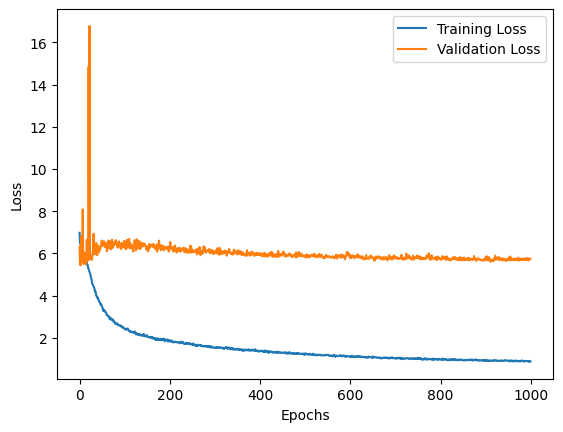

In [243]:
labeled_X = X_train[labeled_indices_lcb]
labeled_y = y_train[labeled_indices_lcb]

# Convert data to PyTorch tensors and define a DataLoader
train_dataset = TensorDataset(torch.tensor(labeled_X, dtype=torch.float32), torch.tensor(labeled_y, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

input_dim = labeled_X.shape[1]
output_dim = labeled_y.shape[1]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PatchAntennaCNN3D().to(device)

model.to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses_lcb, val_losses_lcb, model = train_and_evaluate(model,criterion,optimizer,train_loader, val_loader, num_epochs=1000, batch_size=32)
# evaluate the model
test_loss_lcb=evaluate_model(model, test_loader)
# Plotting losses
plot_loss(train_losses_lcb, val_losses_lcb)


In [244]:
# Function to create a committee of models
def create_committee(model,n_models=5):
    committee = [model for _ in range(n_models)]
    return committee# Function to create a committee of models


In [245]:
# Measure disagreement among the committee
def measure_disagreement(committee, data, mode):
    predictions = []
    for model in committee:
        model.eval()
        with torch.no_grad():
            predictions.append(model(data).unsqueeze(0))
    predictions = torch.cat(predictions, dim=0)
    
    if mode == 'variance':
        disagreement = predictions.var(dim=0).mean(dim=1)
    elif mode == 'entropy':
        probs = F.softmax(predictions, dim=-1)
        avg_probs = probs.mean(dim=0)
        log_avg_probs = torch.log(avg_probs)
        entropy = -torch.sum(avg_probs * log_avg_probs, dim=1)
        disagreement = entropy
    elif mode == 'kl_divergence':
        probs = F.softmax(predictions, dim=-1)
        avg_probs = probs.mean(dim=0)
        kl_divs = torch.sum(probs * (torch.log(probs) - torch.log(avg_probs)), dim=-1)
        disagreement = kl_divs.mean(dim=0)
    return disagreement

In [246]:
# Training loop with QBC
def train_qbc(committee, X, y, X_val, y_val, initial_indices, unlabeled_indices, num_iterations=100, batch_size=32, num_epochs=10,mode='entropy'):
    labeled_indices = initial_indices.copy()
    unlabeled_indices_old = unlabeled_indices.copy()
    unlabeled_indices_new = list(set(unlabeled_indices_old) - set(labeled_indices))  # Ensure no overlap
    criterion = nn.MSELoss()
    optimizers = [optim.Adam(model.parameters(), lr=0.001) for model in committee]
    

    train_losses = []
    val_losses = []

    for iteration in range(num_iterations):
        # Validate indices are within bounds
        labeled_indices = [idx for idx in labeled_indices if idx < len(X)]
        unlabeled_indices = [idx for idx in unlabeled_indices if idx < len(X)]

        # Prepare data
        labeled_X = X[labeled_indices]
        labeled_y = y[labeled_indices]
        train_dataset = TensorDataset(torch.tensor(labeled_X, dtype=torch.float32).to(dev), torch.tensor(labeled_y, dtype=torch.float32).to(dev))
        val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32).to(dev), torch.tensor(y_val, dtype=torch.float32).to(dev))

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        # Train each model in the committee
        iteration_train_losses = []
        iteration_val_losses = []

        for model, optimizer in zip(committee, optimizers):
            model.train()
            train_epoch_loss = 0.0
            for inputs, targets in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()
                train_epoch_loss += loss.item() * inputs.size(0)
            train_epoch_loss /= len(train_loader.dataset)
            iteration_train_losses.append(train_epoch_loss)

            model.eval()
            val_epoch_loss = 0.0
            with torch.no_grad():
                for val_inputs, val_targets in val_loader:
                    val_outputs = model(val_inputs)
                    loss = criterion(val_outputs, val_targets)
                    val_epoch_loss += loss.item() * val_inputs.size(0)
            val_epoch_loss /= len(val_loader.dataset)
            iteration_val_losses.append(val_epoch_loss)

        # Average losses across all models for the current iteration
        avg_train_loss = np.mean(iteration_train_losses)
        avg_val_loss = np.mean(iteration_val_losses)
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

        # Measure disagreement and select the next instance
        if unlabeled_indices_new:
            unlabeled_X = X[unlabeled_indices_new]
            unlabeled_X_tensor = torch.tensor(unlabeled_X, dtype=torch.float32).to(dev)
            disagreement = measure_disagreement(committee, unlabeled_X_tensor,mode)

            if disagreement.numel() > 0:
                next_index_relative = torch.argmax(disagreement).item()
                next_index = unlabeled_indices_new[next_index_relative]
            else:
                continue

            labeled_indices.append(next_index)
            unlabeled_indices_new.remove(next_index)

        if (iteration+1) % 100 == 0:
            print(f"Iteration {iteration+1}/{num_iterations}, Last Train Loss: {train_losses[-1]:.4f}, Last Val Loss: {val_losses[-1]:.4f},Number of labeled indices: {len(labeled_indices)}")

    return train_losses, val_losses, committee , labeled_indices

In [247]:
input_dim = xx.shape[1]
output_dim = S11.shape[1]

# Ensure device is set
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Initial sampling
# initial_indices, unlabeled_indices = initial_sampling(X_train, k=100)
initial_indices5 = initial_indices
unlabeled_indices5= unlabeled_indices


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PatchAntennaCNN3D().to(device)

# Initialize Committee
committee = create_committee(model, n_models=5)

# Train with QBC
train_losses, val_losses, committee, labeled_indices_qbc_var = train_qbc(committee, X_train, y_train, X_val, y_val, initial_indices5, unlabeled_indices5, num_iterations=900, batch_size=32, num_epochs=10,mode='variance')


/var/folders/tt/2b3cc4b54b349j97hzm_dr740000gn/T/ipykernel_14477/1898926332.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(labeled_X, dtype=torch.float32).to(dev), torch.tensor(labeled_y, dtype=torch.float32).to(dev))
/var/folders/tt/2b3cc4b54b349j97hzm_dr740000gn/T/ipykernel_14477/1898926332.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32).to(dev), torch.tensor(y_val, dtype=torch.float32).to(dev))
/var/folders/tt/2b3cc4b54b349j97hzm_dr740000gn/T/ipykernel_14477/1898926332.py:63: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone

Iteration 100/900, Last Train Loss: 0.6375, Last Val Loss: 6.3667,Number of labeled indices: 200
Iteration 200/900, Last Train Loss: 0.5465, Last Val Loss: 5.9571,Number of labeled indices: 300
Iteration 300/900, Last Train Loss: 0.5683, Last Val Loss: 5.6949,Number of labeled indices: 400
Iteration 400/900, Last Train Loss: 0.5805, Last Val Loss: 5.6474,Number of labeled indices: 500
Iteration 500/900, Last Train Loss: 0.5944, Last Val Loss: 5.7663,Number of labeled indices: 600
Iteration 600/900, Last Train Loss: 0.6194, Last Val Loss: 5.7296,Number of labeled indices: 700
Iteration 700/900, Last Train Loss: 0.6318, Last Val Loss: 5.7275,Number of labeled indices: 800
Iteration 800/900, Last Train Loss: 0.6732, Last Val Loss: 6.5370,Number of labeled indices: 900
Iteration 900/900, Last Train Loss: 0.7168, Last Val Loss: 5.7670,Number of labeled indices: 1000


/var/folders/tt/2b3cc4b54b349j97hzm_dr740000gn/T/ipykernel_14477/4112556009.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(labeled_X, dtype=torch.float32), torch.tensor(labeled_y, dtype=torch.float32))


Epoch 100/1000, Train Loss: 2.2425, Val Loss: 6.0652
Epoch 200/1000, Train Loss: 1.6639, Val Loss: 6.0413
Epoch 300/1000, Train Loss: 1.4370, Val Loss: 6.0617
Epoch 400/1000, Train Loss: 1.2112, Val Loss: 5.9141
Epoch 500/1000, Train Loss: 1.1066, Val Loss: 5.8634
Epoch 600/1000, Train Loss: 0.9893, Val Loss: 5.8655
Epoch 700/1000, Train Loss: 0.8861, Val Loss: 5.7860
Epoch 800/1000, Train Loss: 0.8797, Val Loss: 5.7653
Epoch 900/1000, Train Loss: 0.8067, Val Loss: 5.7325
Epoch 1000/1000, Train Loss: 0.7892, Val Loss: 5.6990
Mean Squared Error on test dataset: 5.209926605224609


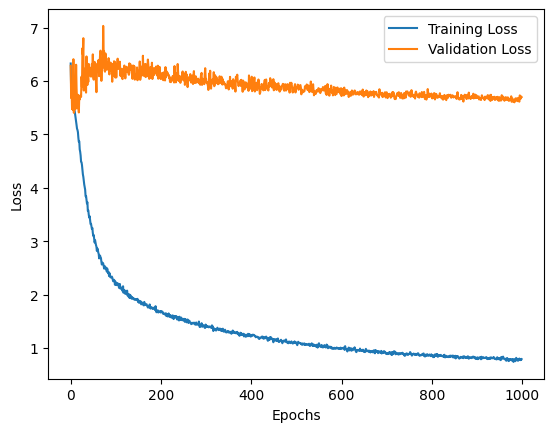

In [250]:
labeled_X = X_train[labeled_indices_qbc_var]
labeled_y = y_train[labeled_indices_qbc_var]

# Convert data to PyTorch tensors and define a DataLoader
train_dataset = TensorDataset(torch.tensor(labeled_X, dtype=torch.float32), torch.tensor(labeled_y, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

input_dim = labeled_X.shape[1]
output_dim = labeled_y.shape[1]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PatchAntennaCNN3D().to(device)
model.to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses_qbc_variance, val_losses_qbc_variance, model = train_and_evaluate(model,criterion,optimizer,train_loader, val_loader, num_epochs=1000, batch_size=32)
# evaluate the model
test_loss_qbc_variance=evaluate_model(model, test_loader)
# Plotting losses
plot_loss(train_losses_qbc_variance, val_losses_qbc_variance)


## BALD

In [251]:
def bald_acquisition_function(outputs):
    # Calculate the predictive entropy
    predictive_entropy = -torch.mean(torch.logsumexp(outputs, dim=0) - torch.log(torch.tensor(outputs.shape[0])))

    # Calculate the expected entropy
    expected_entropy = -torch.mean(torch.sum(outputs * torch.log(outputs + 1e-10), dim=2), dim=0)

    # BALD is the difference between predictive entropy and expected entropy
    acquisition_values = predictive_entropy - expected_entropy
    return acquisition_values


In [252]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Assuming your model and other setup code are defined here

def train_bo(model, X, y, X_val, y_val, initial_indices, unlabeled_indices, num_iterations=100, batch_size=32, num_epochs=10):
    labeled_indices = initial_indices.copy()
    unlabeled_indices_new = unlabeled_indices.copy()
    
    # Initialize the Bayesian Neural Network
    model = model.to(dev)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    val_losses = []

    for iteration in range(num_iterations):
        labeled_X = X[labeled_indices]
        labeled_y = y[labeled_indices]

        train_dataset = TensorDataset(torch.tensor(labeled_X, dtype=torch.float32).to(dev), torch.tensor(labeled_y, dtype=torch.float32).to(dev))
        val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32).to(dev), torch.tensor(y_val, dtype=torch.float32).to(dev))

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        for epoch in range(num_epochs):
            model.train()
            epoch_loss = 0.0
            for inputs, targets in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item() * inputs.size(0)
            epoch_loss /= len(train_loader.dataset)

        train_losses.append(epoch_loss)

        # Bayesian optimization with mc dropout
        model.eval()
        with torch.no_grad():
            unlabeled_X = X[unlabeled_indices_new]
            unlabeled_X_tensor = torch.tensor(unlabeled_X, dtype=torch.float32).to(dev)
            
            # Performing MC dropout
            outputs = torch.stack([F.softmax(model(unlabeled_X_tensor), dim=1) for _ in range(50)], dim=0)
            
            # Compute BALD acquisition values
            acquisition_values = bald_acquisition_function(outputs)

            if acquisition_values.numel() > 0:
                next_index_relative = torch.argmax(acquisition_values).item()
                next_index = unlabeled_indices_new[next_index_relative]
                labeled_indices.append(next_index)
                unlabeled_indices_new.remove(next_index)

        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)

        if (iteration + 1) % 100 == 0:
            print(f"Iteration {iteration + 1}/{num_iterations}, Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}, Number of labeled indices: {len(labeled_indices)}")

    return train_losses, val_losses, model, labeled_indices


In [255]:
input_dim = xx.shape[1]
output_dim = S11.shape[1]

# Ensure device is set
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(dev)

# # Initial sampling
# initial_indices, unlabeled_indices = initial_sampling(X_train, k=100) 
initial_indices7 = initial_indices
unlabeled_indices7= unlabeled_indices


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PatchAntennaCNN3D().to(device)



# Train with BALD9
train_losses, val_losses, committee, labeled_indices_bald = train_bo(model, X_train, y_train, X_val, y_val, initial_indices7, unlabeled_indices7, num_iterations=900, batch_size=32, num_epochs=10)


/var/folders/tt/2b3cc4b54b349j97hzm_dr740000gn/T/ipykernel_14477/1081549596.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(labeled_X, dtype=torch.float32).to(dev), torch.tensor(labeled_y, dtype=torch.float32).to(dev))
/var/folders/tt/2b3cc4b54b349j97hzm_dr740000gn/T/ipykernel_14477/1081549596.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32).to(dev), torch.tensor(y_val, dtype=torch.float32).to(dev))
/var/folders/tt/2b3cc4b54b349j97hzm_dr740000gn/T/ipykernel_14477/1081549596.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone

Iteration 100/900, Train Loss: 0.4975, Val Loss: 6.1971, Number of labeled indices: 200
Iteration 200/900, Train Loss: 0.4712, Val Loss: 5.7923, Number of labeled indices: 300
Iteration 300/900, Train Loss: 0.4568, Val Loss: 5.9070, Number of labeled indices: 400
Iteration 400/900, Train Loss: 0.5198, Val Loss: 6.4038, Number of labeled indices: 500
Iteration 500/900, Train Loss: 0.5361, Val Loss: 5.8643, Number of labeled indices: 600
Iteration 600/900, Train Loss: 0.6086, Val Loss: 5.9361, Number of labeled indices: 700
Iteration 700/900, Train Loss: 0.6733, Val Loss: 5.9625, Number of labeled indices: 800
Iteration 800/900, Train Loss: 0.7144, Val Loss: 5.9282, Number of labeled indices: 900
Iteration 900/900, Train Loss: 0.7423, Val Loss: 5.9149, Number of labeled indices: 1000


/var/folders/tt/2b3cc4b54b349j97hzm_dr740000gn/T/ipykernel_14477/1169464813.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(labeled_X, dtype=torch.float32), torch.tensor(labeled_y, dtype=torch.float32))


Epoch 100/1000, Train Loss: 2.5932, Val Loss: 6.2827
Epoch 200/1000, Train Loss: 1.9253, Val Loss: 6.0539
Epoch 300/1000, Train Loss: 1.6462, Val Loss: 6.1886
Epoch 400/1000, Train Loss: 1.4592, Val Loss: 5.9088
Epoch 500/1000, Train Loss: 1.3225, Val Loss: 6.0118
Epoch 600/1000, Train Loss: 1.1956, Val Loss: 5.7330
Epoch 700/1000, Train Loss: 1.1112, Val Loss: 5.7049
Epoch 800/1000, Train Loss: 1.0485, Val Loss: 5.7452
Epoch 900/1000, Train Loss: 0.9728, Val Loss: 5.6711
Epoch 1000/1000, Train Loss: 0.9239, Val Loss: 5.7330
Mean Squared Error on test dataset: 5.265129566192627


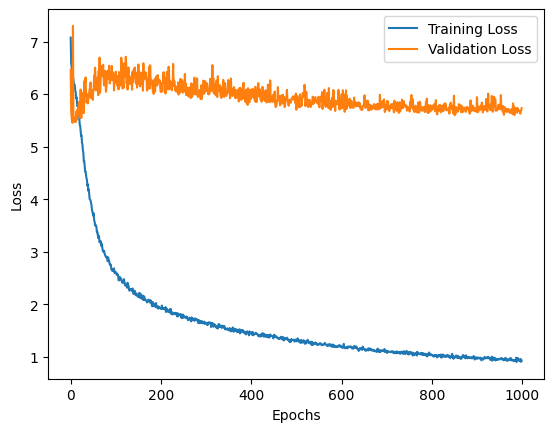

In [256]:
labeled_X = X_train[labeled_indices_bald]
labeled_y = y_train[labeled_indices_bald]

# Convert data to PyTorch tensors and define a DataLoader
train_dataset = TensorDataset(torch.tensor(labeled_X, dtype=torch.float32), torch.tensor(labeled_y, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

input_dim = labeled_X.shape[1]
output_dim = labeled_y.shape[1]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PatchAntennaCNN3D().to(device)
model.to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses_bald, val_losses_bald, model = train_and_evaluate(model,criterion,optimizer,train_loader, val_loader, num_epochs=1000, batch_size=32)
# evaluate the model
test_loss_bald=evaluate_model(model, test_loader)
# Plotting losses
plot_loss(train_losses_bald, val_losses_bald)
